In [1]:
#%matplotlib widget

# Object moments
We have seen that moments can be used to describe contours, similarily, the content of the shape can be described by this feature.


* definition
The definition in the continuous domain is as follow

$$ m_{pq} = \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} x^p y^q f(x,y)\:dx\:dy $$

$$ \mu_{pq} = \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} (x-\bar x)^p (y-\bar y)^q f(x,y)\:dx\:dy $$

$$ \bar{x}=\frac{m_{10}}{m_{00}},\bar{y}=\frac{m_{01}}{m_{00}} $$

for a discrete domain, which is the case for image of pixels, we have

$$ m_{pq} = \sum_{x= -\infty}^{+\infty}\sum_{y=-\infty}^{+\infty} x^p \; y^q \; f(x,y) $$

to eliminate the influence of the absolute shape position, one define the centered moments $\mu$

$$ \mu_{pq} = \sum_{x= -\infty}^{+\infty}\sum_{y=-\infty}^{+\infty} (x-\bar x)^p \; (y-\bar y)^q \; f(x,y) $$ 

to eliminate the influence of the scale, one define $\eta$ as the normalized $\mu$

$$ \eta_{pq} = \frac{\mu_{pq}}{\mu_{00}^\gamma} $$

with 

$$ \gamma = \frac{p+q}{2} + 1 $$

Up to here, $\eta_{pq}$ are independent to translation and scale, by are still dependent to the rotation

Hu defined invariants, called Hu's invariants, that combined $\eta_{pq}$ having the rotation invariance property,

$$  
\begin{align}
I_1 =\ & \eta_{20} + \eta_{02} \\
I_2 =\ & (\eta_{20} - \eta_{02})^2 + (2\eta_{11})^2 \\
I_3 =\ & (\eta_{30} - 3\eta_{12})^2 + (3\eta_{21} - \eta_{03})^2 \\
I_4 =\ & (\eta_{30} + \eta_{12})^2 + (\eta_{21} + \eta_{03})^2 \\
I_5 =\ & (\eta_{30} - 3\eta_{12}) (\eta_{30} + \eta_{12})[ (\eta_{30} + \eta_{12})^2 - 3 (\eta_{21} + \eta_{03})^2] + \\
\ & (3\eta_{21} - \eta_{03}) (\eta_{21} + \eta_{03})[ 3(\eta_{30} + \eta_{12})^2 -  (\eta_{21} + \eta_{03})^2] \\
I_6 =\ & (\eta_{20} - \eta_{02})[(\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2] + 4\eta_{11}(\eta_{30} + \eta_{12})(\eta_{21} + \eta_{03}) \\
I_7 =\ & (3\eta_{21} - \eta_{03})(\eta_{30} + \eta_{12})[(\eta_{30} + \eta_{12})^2 - 3(\eta_{21} + \eta_{03})^2] + \\
\ & (\eta_{30} - 3\eta_{12})(\eta_{21} + \eta_{03})[3(\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2].
\end{align}
$$

High order invariants can be very sensitive to noise, due to the high order exponent in the sum.

> see also
> Moments p514
> Digital image processing.Gonzalez, Rafael C. 2009. Pearson education.


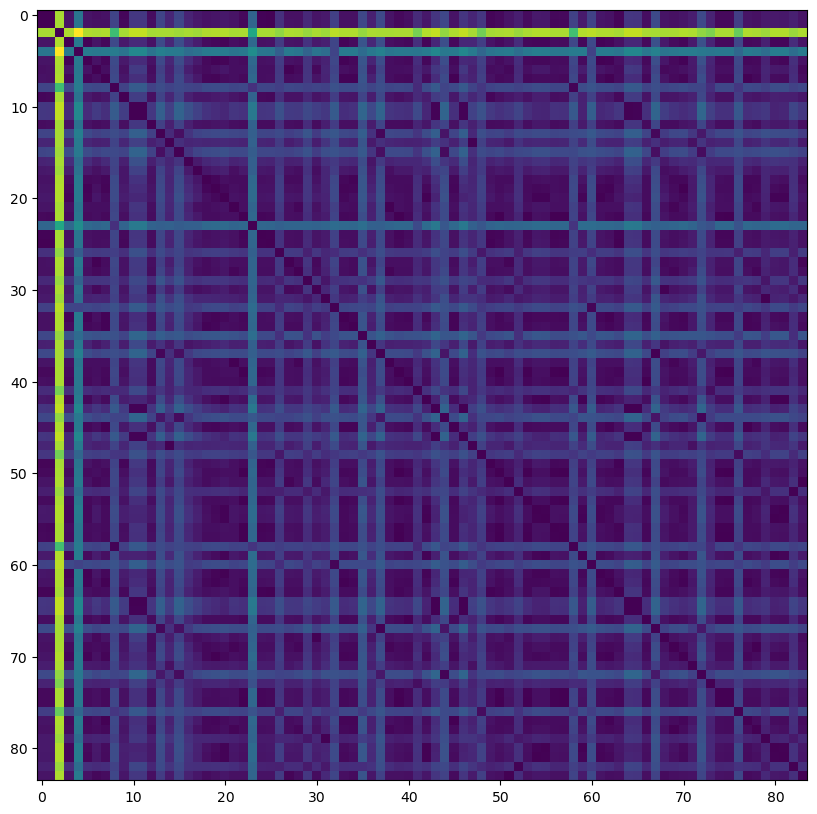

In [2]:
import numpy as np
from skimage.morphology import disk, square
import matplotlib.pyplot as plt
from skimage.measure import label,regionprops
from skimage.io import imread
from scipy.spatial.distance import pdist,squareform

ima = imread('../../data/alphabet.png')[:,:,0]==0
lab,nlab = label(ima,return_num=True)

# extract label features
props = regionprops(lab)

hu = []
for p in props:
    hu.append(p.moments_hu)
hu = np.asarray(hu)

# normalize Hu's features
mean_hu = np.mean(hu,axis=0)
std_hu = np.std(hu,axis=0)
norm_hu = (hu-mean_hu)/std_hu

# compute pairwize distance based on normalized Hu's features
dist = squareform(pdist(norm_hu))

plt.figure(figsize=[10,10])
plt.imshow(dist,interpolation='nearest');
plt.show()

searching for nearest resembling object, using Hu's invariant features

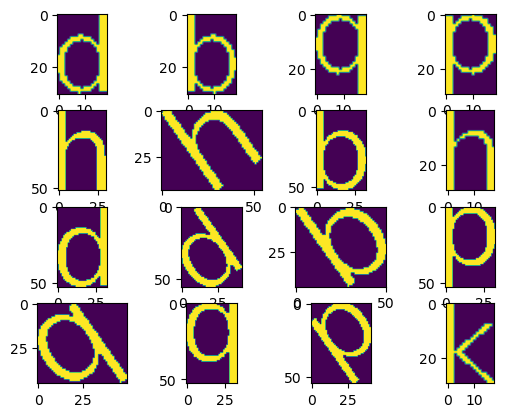

In [3]:
idx = np.argsort(dist[1,:])
plt.figure()
for j,i in enumerate(idx[:16]):
    bb = props[i].bbox
    crop = ima[bb[0]:bb[2],bb[1]:bb[3]]
    plt.subplot(4,4,j+1)
    plt.imshow(crop)
plt.show()